### 매매-전월세 스프레드 추정

#### 매매가격

아파트 가격

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

apt = pd.read_excel('../Data/apt_buy.xlsx')
apt

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,등기일자,거래유형,중개사소재지
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.7500,202309,13,"182,000",6,1988,언주로 103,NaN,,중개거래,서울 강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.9700,202307,26,"205,000",5,1987,언주로 3,NaN,20230925,직거래,-
2,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,105.8064,202306,29,"240,000",8,2021,개포로 311,NaN,20230920,중개거래,"서울 강남구, 서울 송파구"
3,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,"245,000",10,2021,개포로 311,NaN,,중개거래,서울 강남구
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,84.8300,202211,25,"240,000",33,2020,개포로 264,NaN,,중개거래,서울 강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31033,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.7600,202307,26,"58,500",15,1997,동일로 752,NaN,20230727,중개거래,서울 중랑구
31034,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),50.3700,202308,4,"54,200",9,1997,동일로 752,NaN,,중개거래,서울 중랑구
31035,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.7600,202308,23,"58,000",2,1997,동일로 752,NaN,,중개거래,서울 중랑구
31036,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),50.3700,202309,4,"54,000",10,1997,동일로 752,NaN,,중개거래,서울 중랑구


In [2]:
apt.index = apt['시군구'].str.replace('서울특별시', '').str.replace(' ','')

In [3]:
apt['거래금액(만원)'] = apt['거래금액(만원)'].str.replace(',','')

In [4]:
apt['평당가격'] = apt['거래금액(만원)'].astype(float) / apt['전용면적(㎡)'].astype(float)

In [5]:
apt['평당가격']

시군구
강남구개포동    2340.836013
강남구개포동    2563.461298
강남구개포동    2268.293789
강남구개포동    2264.289748
강남구개포동    2829.187787
             ...     
중랑구중화동     978.915663
중랑구중화동    1076.037324
중랑구중화동     970.548862
중랑구중화동    1072.066706
중랑구중화동    1042.287076
Name: 평당가격, Length: 31038, dtype: float64

In [6]:
apt_new = apt[['평당가격', '건축년도']]

다세대주택 매매가격

In [7]:
multihouse = pd.read_excel('../Data/다세대매매.xlsx')
multihouse

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,1164-27,1164,27,(1164-27),51.78,36.36,202309,22,"88,000",3,2016,논현로2길 66,NaN,중개거래,서울 서초구
1,서울특별시 강남구 개포동,1262,1262,0,(1262-0),108.28,72.93,202301,9,"132,000",3,2006,개포로31길 20,NaN,중개거래,서울 강남구
2,서울특별시 강남구 개포동,1186,1186,0,1186HOUSE,50.37,33.19,202308,4,"60,000",3,2020,논현로8길 24,NaN,중개거래,서울 강남구
3,서울특별시 강남구 개포동,1213,1213,0,1213,49.99,27.11,202307,5,"79,000",3,2016,개포로32길 6,NaN,중개거래,서울 강남구
4,서울특별시 강남구 개포동,1218-12,1218,12,1218-12,27.15,16.38,202304,22,"46,000",3,2019,개포로24길 32,NaN,중개거래,"서울 강남구, 서울 서초구"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21180,서울특별시 중랑구 중화동,180-6,180,6,화인하우스3,74.97,43.20,202211,30,"57,850",3,2022,동일로126길 55,NaN,직거래,-
21181,서울특별시 중랑구 중화동,180-6,180,6,화인하우스3,79.62,45.88,202211,30,"60,300",2,2022,동일로126길 55,NaN,직거래,-
21182,서울특별시 중랑구 중화동,180-6,180,6,화인하우스3,58.37,33.63,202211,30,"46,750",4,2022,동일로126길 55,NaN,직거래,-
21183,서울특별시 중랑구 중화동,180-6,180,6,화인하우스3,59.71,34.41,202211,30,"47,000",5,2022,동일로126길 55,NaN,직거래,-


In [8]:
multihouse.index = multihouse['시군구'].str.replace('서울특별시', '').str.replace(' ','')
multihouse['거래금액(만원)'] = multihouse['거래금액(만원)'].str.replace(',','')
multihouse['평당가격'] = multihouse['거래금액(만원)'].astype(float) / multihouse['전용면적(㎡)'].astype(float)

In [9]:
multihouse_new = multihouse[['평당가격', '건축년도']]

#### 전월세가격

In [13]:
rent = pd.read_excel('../Data/apt_rent.xlsx')
rent

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,202308,29,"4,013",11,14,1991.0,개포로109길 5,-,-,-,,
1,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,202212,5,"60,000",0,9,1988.0,언주로 103,-,-,-,,
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,202212,5,"60,000",0,9,1988.0,언주로 103,202301~202501,갱신,사용,"65,000",0
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,202302,16,"64,000",0,5,1988.0,언주로 103,202303~202305,갱신,-,"64,000",0
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,202303,15,"50,000",0,5,1988.0,언주로 103,202304~202504,신규,-,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266012,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),월세,59.76,202309,26,"5,000",83,23,1997.0,동일로 752,202310~202510,갱신,사용,"5,000",79
266013,서울특별시 중랑구 중화동,274-75,274.0,75.0,한영(102),월세,66.54,202309,24,"4,500",80,5,2003.0,동일로144길 74,202311~202511,신규,-,0,0
266014,서울특별시 중랑구 중화동,274-77,274.0,77.0,한영(104),전세,67.57,202306,15,"26,000",0,2,2003.0,동일로144길 74,202307~202507,갱신,-,"25,000",0
266015,서울특별시 중랑구 중화동,11,11.0,0.0,현대휴앤미,전세,82.97,202303,18,"40,000",0,7,2007.0,봉화산로27가길 23,202306~202506,신규,-,0,0


In [14]:
rent = rent[rent['전월세구분'] == '전세']

In [15]:
rent.index = rent['시군구'].str.replace('서울특별시', '').str.replace(' ','')

In [16]:
rent['보증금(만원)'] = rent['보증금(만원)'].str.replace(',','')

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_66622/651703944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['보증금(만원)'] = rent['보증금(만원)'].str.replace(',','')


In [17]:
rent['평당가격'] = rent['보증금(만원)'].astype(float) / rent['전용면적(㎡)'].astype(float)

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_66622/1665707906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['평당가격'] = rent['보증금(만원)'].astype(float) / rent['전용면적(㎡)'].astype(float)


In [18]:
rent_new = rent[['평당가격', '건축년도']]

다세대주택 전세가격

In [19]:
renthouse = pd.read_excel('../Data/다세대전세.xlsx')
renthouse

,시군구,번지,본번,부번,건물명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,1163-4,1163,4,(1163-4),전세,13.56,202212,12,"10,000",0,5,2013.0,논현로 10,202301~202501,신규,-,0,0
1,서울특별시 강남구 개포동,1163-4,1163,4,(1163-4),전세,21.88,202301,20,"16,000",0,3,2013.0,논현로 10,202302~202502,신규,-,0,0
2,서울특별시 강남구 개포동,1163-4,1163,4,(1163-4),월세,13.56,202301,28,"1,000",50,2,2013.0,논현로 10,202302~202501,신규,-,0,0
3,서울특별시 강남구 개포동,1163-4,1163,4,(1163-4),월세,13.56,202303,9,"2,500",45,4,2013.0,논현로 10,202304~202503,신규,-,0,0
4,서울특별시 강남구 개포동,1163-4,1163,4,(1163-4),전세,21.88,202307,22,"17,000",0,5,2013.0,논현로 10,-,-,-,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129273,서울특별시 중랑구 중화동,325-22,325,22,힐하우스,월세,29.09,202212,20,"17,000",20,5,2018.0,중랑천로 119,202212~202412,갱신,-,"17,000",10
129274,서울특별시 중랑구 중화동,325-22,325,22,힐하우스,전세,29.09,202303,7,"20,000",0,4,2018.0,중랑천로 119,202304~202504,신규,-,0,0
129275,서울특별시 중랑구 중화동,325-22,325,22,힐하우스,전세,29.09,202304,27,"20,000",0,3,2018.0,중랑천로 119,202306~202506,신규,-,0,0
129276,서울특별시 중랑구 중화동,325-22,325,22,힐하우스,전세,29.09,202308,17,"20,000",0,2,2018.0,중랑천로 119,202309~202509,신규,-,0,0


In [20]:
renthouse = renthouse[renthouse['전월세구분'] == '전세']
renthouse.index = renthouse['시군구'].str.replace('서울특별시', '').str.replace(' ','')
renthouse['보증금(만원)'] = renthouse['보증금(만원)'].str.replace(',','')
renthouse['평당가격'] = renthouse['보증금(만원)'].astype(float) / renthouse['전용면적(㎡)'].astype(float)
renthouse_new = renthouse[['평당가격', '건축년도']]

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_66622/323173706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renthouse['보증금(만원)'] = renthouse['보증금(만원)'].str.replace(',','')
/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_66622/323173706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renthouse['평당가격'] = renthouse['보증금(만원)'].astype(float) / renthouse['전용면적(㎡)'].astype(float)


In [21]:
renthouse_new

,평당가격,건축년도
시군구,,
강남구개포동,737.463127,2013.0
강남구개포동,731.261426,2013.0
강남구개포동,776.965265,2013.0
강남구개포동,701.168614,2012.0
강남구개포동,774.107441,2012.0
...,...,...
중랑구중화동,614.964127,2016.0
중랑구중화동,614.964127,2016.0
중랑구중화동,687.521485,2018.0


#### Preprocessing

In [23]:
apt_new = apt_new.groupby(apt_new.index).mean()
rent_new = rent_new.groupby(rent_new.index).mean()
multihouse_new = multihouse_new.groupby(multihouse_new.index).mean()
renthouse_new = renthouse_new.groupby(renthouse_new.index).mean()

In [24]:
apt_new

,평당가격,건축년도
시군구,,
강남구개포동,2850.028556,2003.478992
강남구논현동,1771.137949,1999.767857
강남구대치동,2714.963687,1990.513043
강남구도곡동,2414.508144,2001.142336
강남구삼성동,2422.619976,2005.563830
...,...,...
중랑구면목동,979.819461,2010.823293
중랑구묵동,814.939558,2004.246377
중랑구상봉동,959.024324,2006.311111


In [25]:
rent_new

,평당가격,건축년도
시군구,,
강남구개포동,1070.702161,2005.165748
강남구논현동,935.445019,2002.893519
강남구대치동,1051.647453,1992.978500
강남구도곡동,1074.370061,1998.498895
강남구삼성동,1117.912357,2003.755047
...,...,...
중랑구면목동,608.467083,2006.376079
중랑구묵동,528.336727,2003.281633
중랑구상봉동,709.582839,2008.901818


In [26]:
multihouse_new

,평당가격,건축년도
시군구,,
강남구개포동,1210.531102,2006.438356
강남구논현동,1139.094451,2006.775000
강남구대치동,1163.842389,2001.800000
강남구도곡동,877.530441,2010.307692
강남구삼성동,1664.851166,2004.365854
...,...,...
중랑구면목동,881.367030,2014.663883
중랑구묵동,692.433847,2014.522293
중랑구상봉동,885.739065,2012.887931


In [27]:
renthouse_new

,평당가격,건축년도
시군구,,
강남구개포동,732.068438,2007.690423
강남구논현동,864.782503,2009.609842
강남구대치동,746.193866,2005.928161
강남구도곡동,832.311703,2005.961538
강남구삼성동,738.569674,2002.778351
...,...,...
중랑구면목동,641.741147,2014.169014
중랑구묵동,534.118020,2010.720238
중랑구상봉동,775.285657,2015.909091


In [30]:
price = pd.concat([apt_new['평당가격'], multihouse_new['평당가격'], rent_new['평당가격'], renthouse_new['평당가격']], axis = 1)
price.columns = ['apt_buy', 'mth_buy', 'apt_rent', 'mth_rent']

In [43]:
# price.to_csv("../Data/house_price.csv")

In [33]:
price

,apt_buy,mth_buy,apt_rent,mth_rent
시군구,,,,
강남구개포동,2850.028556,1210.531102,1070.702161,732.068438
강남구논현동,1771.137949,1139.094451,935.445019,864.782503
강남구대치동,2714.963687,1163.842389,1051.647453,746.193866
강남구도곡동,2414.508144,877.530441,1074.370061,832.311703
강남구삼성동,2422.619976,1664.851166,1117.912357,738.569674
...,...,...,...,...
종로구누하동,NaN,NaN,NaN,550.418318
종로구명륜4가,NaN,NaN,NaN,812.566547
종로구체부동,NaN,NaN,NaN,456.308911


In [34]:
build_year = pd.concat([apt_new['건축년도'], multihouse_new['건축년도'], rent_new['건축년도'], renthouse_new['건축년도']], axis = 1)
build_year.columns = ['apt_buy', 'mth_buy', 'apt_rent', 'mth_rent']

In [36]:
# build_year.to_csv('../Data/build_year.csv')

In [37]:
apt_buy_num = 31038
apt_rent_num = 266017
house_buy_num = 21185
house_rent_num = 129278

#### Spread 추정

In [38]:
price = price.fillna(0)
price['house_buy'] = price['apt_buy'] * (apt_buy_num / (apt_buy_num + house_buy_num)) + price['mth_buy'] * (house_buy_num / (apt_buy_num + house_buy_num))

In [40]:
price['house_rent'] = price['apt_rent'] * (apt_rent_num / (apt_rent_num + house_rent_num)) + price['mth_rent'] * (house_rent_num / (apt_rent_num + house_rent_num))
price

,apt_buy,mth_buy,apt_rent,mth_rent,house_buy,house_rent
시군구,,,,,,
강남구개포동,2850.028556,1210.531102,1070.702161,732.068438,2184.943181,959.954769
강남구논현동,1771.137949,1139.094451,935.445019,864.782503,1514.740547,912.335421
강남구대치동,2714.963687,1163.842389,1051.647453,746.193866,2085.729351,951.751353
강남구도곡동,2414.508144,877.530441,1074.370061,832.311703,1791.011358,995.206853
강남구삼성동,2422.619976,1664.851166,1117.912357,738.569674,2115.220320,993.851432
...,...,...,...,...,...,...
종로구누하동,0.000000,0.000000,0.000000,550.418318,0.000000,180.009814
종로구명륜4가,0.000000,0.000000,0.000000,812.566547,0.000000,265.743250
종로구체부동,0.000000,0.000000,0.000000,456.308911,0.000000,149.232101


In [41]:
spread = 1 - price['house_rent'] / price['house_buy']

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_66622/3079673728.py:6: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.rcdefaults()
/Users/junghunlee/anaconda3/envs/BusinessAnalytics_python/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/junghunlee/anaconda3/envs/BusinessAnalytics_python/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


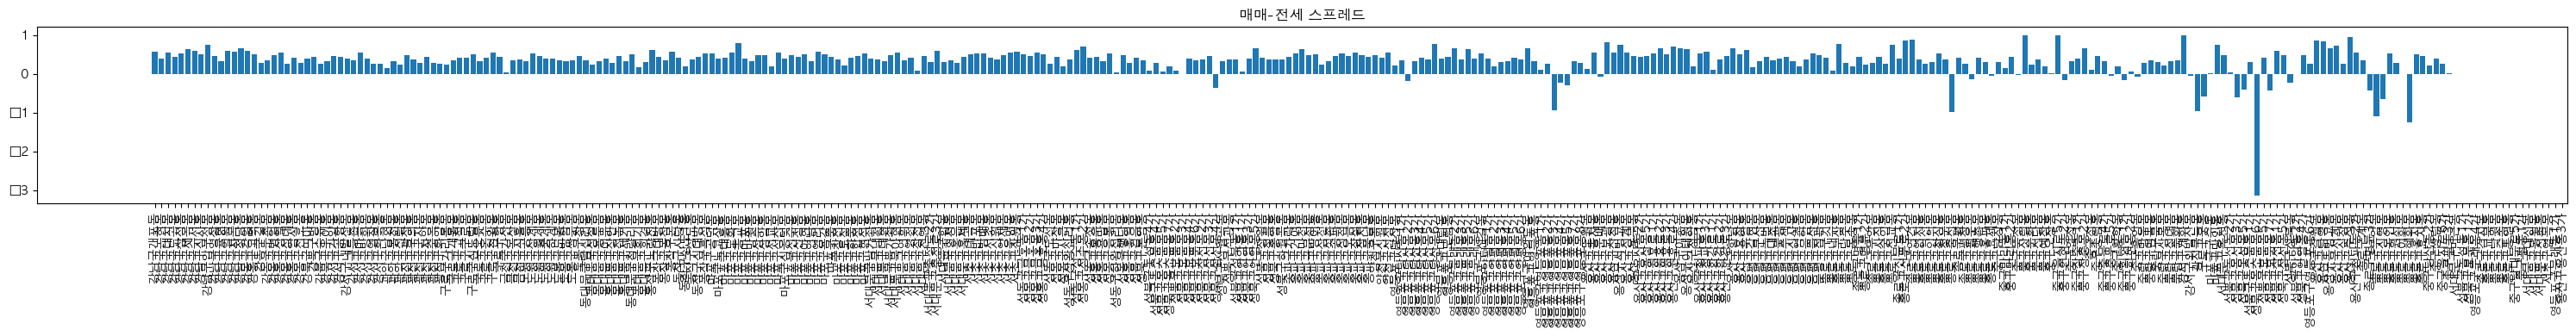

In [42]:
from matplotlib import font_manager, rc

rc('font', family = 'AppleGothic')
plt.figure(figsize = (30, 4))
plt.bar(spread.index, spread)
plt.rcdefaults()
plt.xticks(rotation = 90)
plt.grid(False)
plt.title('매매-전세 스프레드', fontsize = 12, fontfamily = 'AppleGothic')
plt.tight_layout()